We import necessary libraries including nltk (Natural Language Toolkit) for corpus access, gensim for Word2Vec modeling, sklearn for PCA (Principal Component Analysis), and matplotlib for visualization.

In [11]:
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

We download the Brown corpus using NLTK (brown.sents()) as a sample dataset for training the Word2Vec model.

In [12]:
# Download NLTK resources (if not already downloaded)
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [14]:
# Load the Brown corpus (you can use any other corpus or dataset)
sentences = brown.sents()

In [15]:
sentences

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

We train a Word2Vec model (Word2Vec) on the sentences from the Brown corpus, specifying parameters like vector_size (dimensionality of word vectors), window (context window size), min_count (minimum frequency threshold for words), and sg (training algorithm).

In [16]:
# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, sg=0)

Parameters:
* sentences: List of tokenized sentences (list of lists of words).
* vector_size: Dimensionality of the word vectors (e.g., 100 dimensions).
* window: Maximum distance between the current and predicted word within a sentence (context window size).
* min_count: Ignores all words with a total frequency lower than this.
* sg: Training algorithm (0 for CBOW, 1 for Skip-gram).

We extract the vocabulary (words) and corresponding word vectors (word_vectors) from the trained model.

In [17]:
# Get vocabulary and word vectors
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

In [22]:
words

['the',
 ',',
 '.',
 'of',
 'and',
 'to',
 'a',
 'in',
 'that',
 'is',
 'was',
 'for',
 '``',
 "''",
 'The',
 'with',
 'it',
 'as',
 'he',
 'his',
 'on',
 'be',
 ';',
 'I',
 'by',
 'had',
 'at',
 '?',
 'not',
 'are',
 'from',
 'or',
 'this',
 'have',
 'an',
 'which',
 '--',
 'were',
 'but',
 'He',
 'her',
 'one',
 'they',
 'you',
 'all',
 'would',
 'him',
 'their',
 'been',
 ')',
 '(',
 'has',
 'will',
 'who',
 'more',
 'out',
 'It',
 'we',
 'she',
 'said',
 'there',
 'up',
 'In',
 ':',
 'than',
 'them',
 'into',
 'no',
 'its',
 'about',
 'so',
 'when',
 'can',
 'only',
 'other',
 '!',
 'could',
 'time',
 'if',
 'what',
 'some',
 'But',
 'A',
 'two',
 'any',
 'may',
 'do',
 'first',
 'like',
 'these',
 'over',
 'such',
 'This',
 'me',
 'my',
 'man',
 'our',
 'made',
 'new',
 'most',
 'now',
 'then',
 'must',
 'also',
 'Af',
 'did',
 'even',
 'back',
 'before',
 'years',
 'through',
 'And',
 'many',
 'She',
 'much',
 'way',
 'down',
 'your',
 'should',
 'There',
 'where',
 'They',
 'Mr.

In [23]:
word_vectors

array([[ 2.4320357e-01,  1.5632454e+00,  5.0935501e-01, ...,
        -5.1209688e-01,  1.0809052e+00,  8.6454087e-01],
       [-7.4727058e-01,  4.6343952e-01,  6.8107136e-02, ...,
        -4.5409381e-01, -7.9214710e-01, -7.2057295e-01],
       [-1.7857593e-01,  6.0505933e-01, -1.1053686e+00, ...,
         2.8886685e-01,  1.2766122e+00, -8.0529845e-01],
       ...,
       [ 6.7273967e-02,  3.8619641e-02,  3.0692298e-02, ...,
        -5.1468287e-02,  1.3296830e-02, -2.1022260e-03],
       [ 6.4650275e-02,  5.2134432e-02,  2.7053773e-02, ...,
        -3.7982855e-02,  1.1505758e-02, -3.9999418e-02],
       [ 6.3411258e-02,  6.2459171e-02,  3.6099628e-02, ...,
        -4.7299553e-02,  2.4189090e-02,  1.6682010e-04]], dtype=float32)

We apply Principal Component Analysis (PCA) to reduce the dimensionality of word vectors (word_vectors) to 2 dimensions (n_components=2).

pca.fit_transform(word_vectors): Fits PCA to word_vectors and transforms them into 2D space (pca_result).

In [18]:
# Reduce dimensionality of word vectors for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

In [24]:
pca_result

array([[ 1.8616602 , -0.7689906 ],
       [ 1.8117527 ,  0.58307487],
       [ 1.674794  , -0.02006241],
       ...,
       [-0.6246048 ,  0.19505206],
       [-0.64644307,  0.12119671],
       [-0.5852532 ,  0.10081019]], dtype=float32)

We plot the word embeddings in a 2D space using matplotlib, with words annotated on the plot based on their PCA-transformed coordinates.

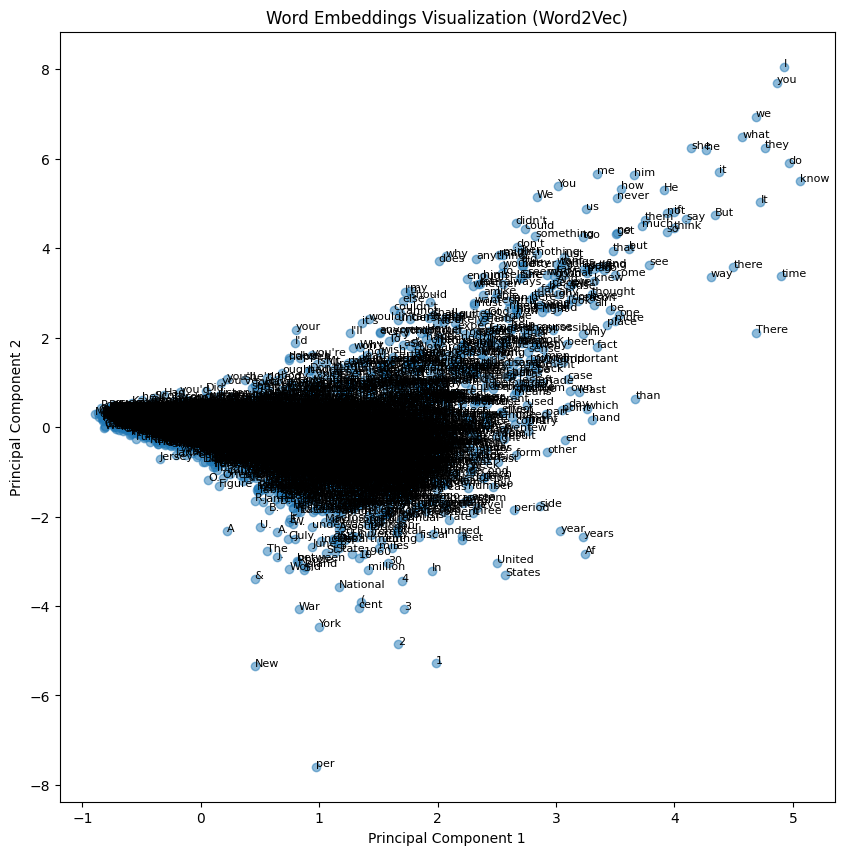

In [27]:
# Reduce dimensionality of word vectors for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Plot word embeddings in 2D space
plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)

# Annotate some words on the plot
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), fontsize=8)

plt.title('Word Embeddings Visualization (Word2Vec)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()